<a href="https://colab.research.google.com/github/angelo-neto-programador/Trabalho-de-ICD/blob/main/TRABALHO_DE_ICD_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensões, Medidas de centralidade, Dispersão e Extensão Dos Dados

In [28]:
import pandas as pd

# Carregar o dataset
data = pd.read_csv('emails.csv', header=None, names=['Comprimento', 'Stopwords', 'Frequência', 'Termos_SPAM', 'Prob_SPAM'])

# Configurar a precisão das saídas numéricas
# ANTES de exibir o DataFrame
pd.options.display.float_format = "{:.2f}".format

print(data.head())

# Dimensões
dimensoes = data.shape
print(f"\nDimensões: {dimensoes[0]} linhas, {dimensoes[1]} colunas")

# Medidas de Centralidade
media = data.mean()
mediana = data.median()

# Medidas de Dispersão
variancia = data.var()
desvio_padrao = data.std()
amplitude = data.max() - data.min()


print("\nMedidas de Centralidade:")
print(f"Média:\n{media}\n")
print(f"Mediana:\n{mediana}\n")

print("Medidas de Dispersão:")
print(f"Variância:\n{variancia}\n")
print(f"Desvio Padrão:\n{desvio_padrao}\n")
print(f"Amplitude:\n{amplitude}\n")

   Comprimento  Stopwords  Frequência  Termos_SPAM  Prob_SPAM
0       700.00      70.00        0.00         0.00       0.00
1       680.00      20.00        5.00         1.00       0.33
2      1380.00      90.00        7.00         1.00       0.47
3       580.00      10.00        2.00         1.00       0.13
4       980.00      50.00        3.00         1.00       0.20

Dimensões: 100 linhas, 5 colunas

Medidas de Centralidade:
Média:
Comprimento   1815.80
Stopwords       51.50
Frequência       5.67
Termos_SPAM      2.71
Prob_SPAM        0.66
dtype: float64

Mediana:
Comprimento   1280.00
Stopwords       50.00
Frequência       5.00
Termos_SPAM      1.00
Prob_SPAM        0.53
dtype: float64

Medidas de Dispersão:
Variância:
Comprimento   1895161.98
Stopwords         616.92
Frequência         11.31
Termos_SPAM         8.49
Prob_SPAM           0.26
dtype: float64

Desvio Padrão:
Comprimento   1376.65
Stopwords       24.84
Frequência       3.36
Termos_SPAM      2.91
Prob_SPAM        0.51
d

# Histograma

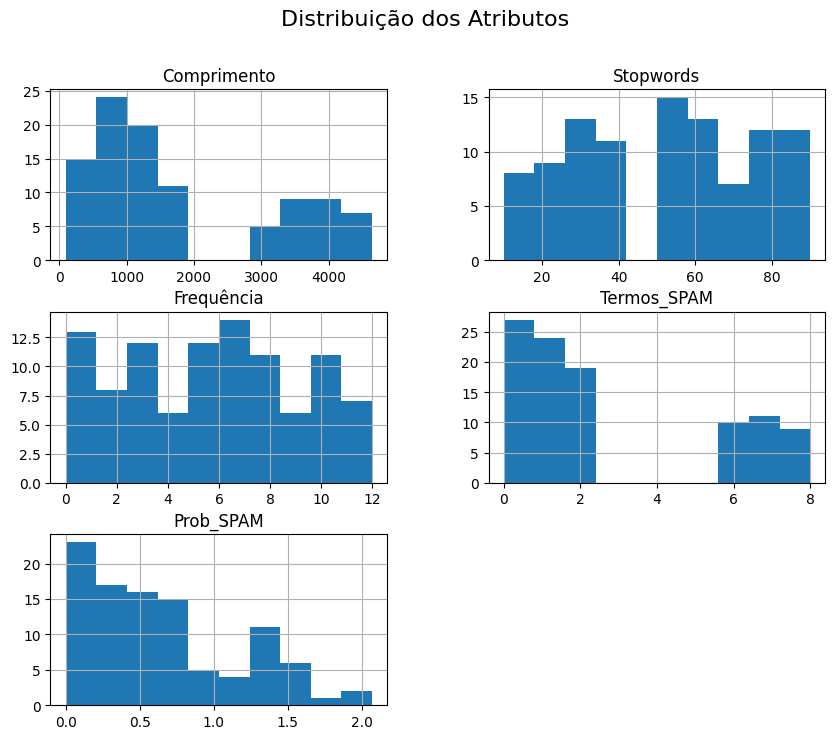

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramas para cada atributo
data.hist(bins=10, figsize=(10, 8))
plt.suptitle('Distribuição dos Atributos', fontsize=16)
plt.show()


# Boxplot Comparativo

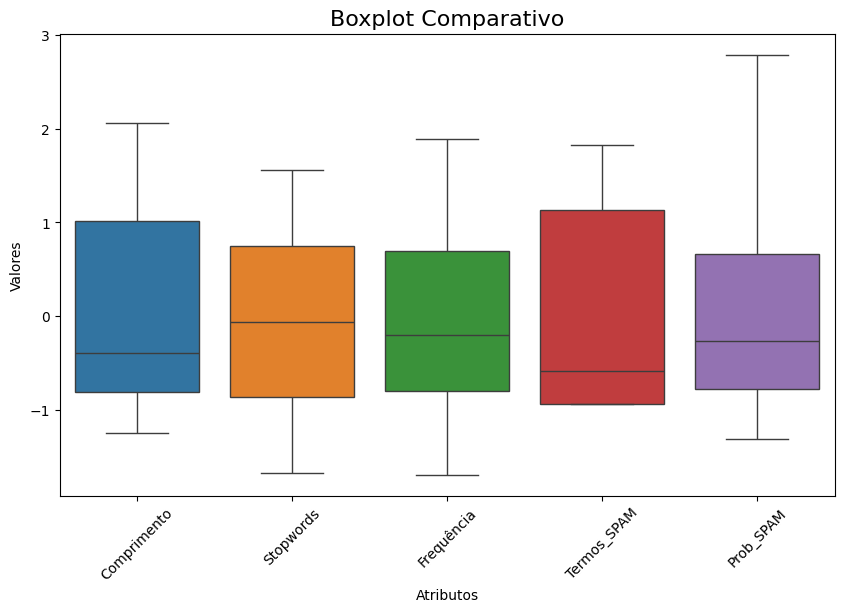

In [30]:
from sklearn.preprocessing import StandardScaler

# Selecionar as colunas a serem padronizadas
colunas = ['Comprimento', 'Stopwords', 'Frequência', 'Termos_SPAM', 'Prob_SPAM']

# Criar o scaler
scaler = StandardScaler()

# Aplicar a padronização
data_padronizado = scaler.fit_transform(data[colunas])

# Converter de volta para um DataFrame
data_padronizado = pd.DataFrame(data_padronizado, columns=colunas)

# Gerar o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_padronizado)
plt.title('Boxplot Comparativo', fontsize=16)
plt.xlabel('Atributos')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.show()

#Padronização (Z-Score)
# Padronizar os dados significa transformar os valores para que eles tenham uma média de 0 e um desvio padrão de 1.
# Isso pode ser feito com o StandardScaler do scikit-learn;

# Matriz de Correlação

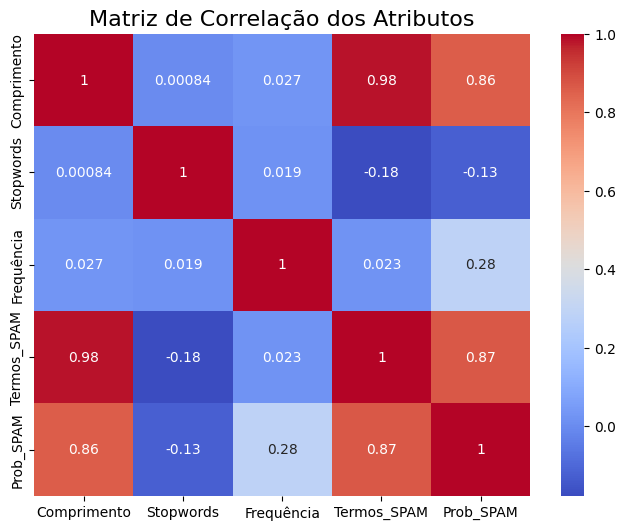

In [31]:
# # Matriz de correlação
correlacao = data.corr()

# # Exibir a matriz de correlação
# print(correlacao)

# Mapa de calor da matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação dos Atributos', fontsize=16)
plt.show()

# Divisão em Grupos

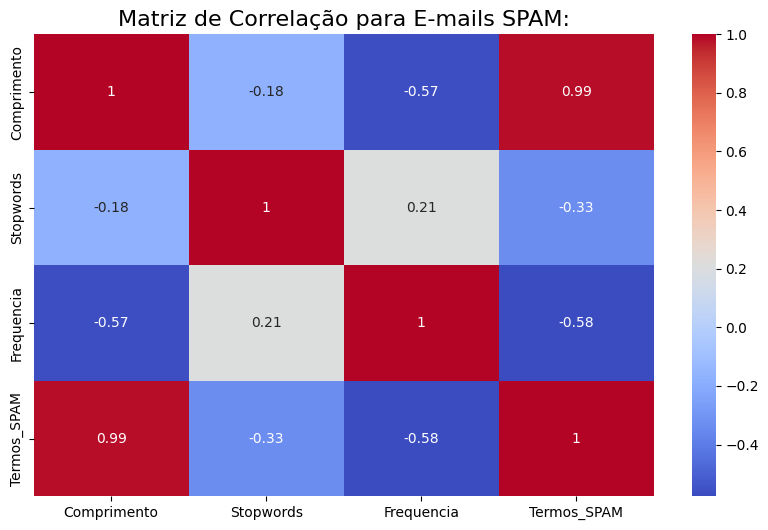

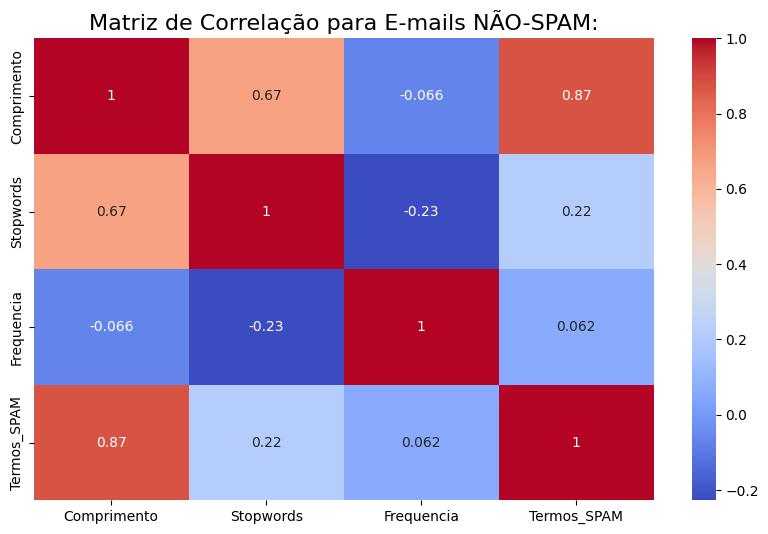

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

df.columns = ['Comprimento', 'Stopwords', 'Frequencia', 'Termos_SPAM', 'Prob_SPAM']
# Criar o mapa de calor para E-mails SPAM
plt.figure(figsize=(10, 6))
sns.heatmap(correlacao_spam, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação para E-mails SPAM:', fontsize=16)
plt.show()

# Criar o mapa de calor para E-mails NÃO-SPAM
plt.figure(figsize=(10, 6))
sns.heatmap(correlacao_nao_spam, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação para E-mails NÃO-SPAM:', fontsize=16)
plt.show()


# Aplicação do Método de Aprendizado de Máquina (SVC - SVM)

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



df = pd.read_csv('emails.csv', header=None)

df.columns = ['Comprimento', 'Stopwords', 'Frequencia', 'Termos_SPAM', 'Prob_SPAM']



# Verificar se há dados faltantes
print("\nVerificando valores nulos:\n", df.isnull().sum())

# Definir as variáveis explicativas (X) e a variável alvo (y)
X = df[['Comprimento', 'Stopwords', 'Frequencia', 'Termos_SPAM']]
y = df['Prob_SPAM'].apply(lambda x: 1 if x > 0.5 else 0)  # Classificação binária (0 ou 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Definir o modelo SVC e a busca de parâmetros (GridSearch)
svc = SVC(kernel='linear', random_state=42)
parametros = {'C': [0.01, 0.1, 1, 10, 100]}  # Valores de C a serem testados

# Validação cruzada com 3 folds
grid_search = GridSearchCV(svc, parametros, cv=3)
grid_search.fit(X_train, y_train)

# Exibir o melhor parâmetro C encontrado
print(f"\nMelhor parâmetro C: {grid_search.best_params_['C']}")

# Fazer previsões no conjunto de teste
y_pred = grid_search.best_estimator_.predict(X_test)

# Avaliar o modelo
acuracia = accuracy_score(y_test, y_pred)
matriz_confusao = confusion_matrix(y_test, y_pred)
relatorio_classificacao = classification_report(y_test, y_pred)


print(f"\nAcurácia: {acuracia:.2f}")
print(f"\nMatriz de Confusão:\n{matriz_confusao}")
print(f"\nRelatório de Classificação:\n{relatorio_classificacao}")

#Acurácia: precisão

#[ Verdadeiro Negativo(TN) Falso Positivo(FP)   ]
#[ Falso Negativo(FN)  Verdadeiro Positivo(TP)  ]

#corretamente 15 emails como spam;


Verificando valores nulos:
 Comprimento    0
Stopwords      0
Frequencia     0
Termos_SPAM    0
Prob_SPAM      0
dtype: int64

Melhor parâmetro C: 10

Acurácia: 0.93

Matriz de Confusão:
[[13  1]
 [ 1 15]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.94      0.94      0.94        16

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

